In [67]:
%matplotlib inline
#import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.spatial.distance import cdist, pdist
from scipy.spatial import distance_matrix
import time
from collections import Counter
import bisect

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

trainDataFrame = train
trainDataLabels = trainDataFrame[trainDataFrame.columns[0]].values
testDataFrame = test


In [106]:
def predict(trainDataSets, testData, labels, k, n):
    print(testData.shape, trainDataSets.shape)
    dists = cdist(testData, trainDataSets, 'euclidean')
    lookup = np.matrix.argsort(dists)
    prediction = []
    rangeArray = np.arange(k)
    for j in range (n):
        potentialLabels = [labels[lookup[j][i]] for i in rangeArray]
        res = Counter(potentialLabels)
        value, count = res.most_common(1)[0]
        prediction.append(value)
    print prediction


In [117]:
from IPython import parallel

rc = parallel.client()
lv = rc.load_balanced_view()

def knn_main(n,k):
    train_forKNN = np.array(trainDataFrame.ix[:, 1:])
    test_forKNN = np.array(testDataFrame.ix[:n,:])

    label = predict(train_forKNN, test_forKNN, trainDataLabels, k, n)

lv.map_sync(knn_main(10,5))

No module named ipyparallel



AttributeError: client

Widget Javascript not detected.  It may not be installed or enabled properly.


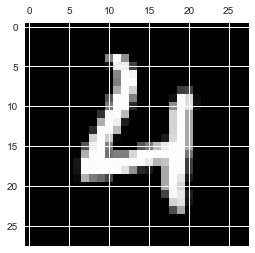

In [105]:
train_shape = train.drop(['label'], axis = 1)
train_label = train['label']

train_shape_matrix = train_shape.as_matrix()

def show_image(n):
    print "Label:", train_label[n]
    plt.matshow(train_shape_matrix[n].reshape(28,28), cmap='gray')
    
interact(show_image, n=(0, 41999));

In [ ]:
print (train_label.value_counts(ascending=True)/len(train_label))

sns.set_color_codes()

sns.distplot(train_label, color='y')

In [ ]:
def findNearest():
    numberCount = np.arange(10)
    nearestMatrix = []
    train_transform = trainDataFrame.ix[:, 1:]
    for i in xrange(len(trainDataLabels)):
        if trainDataLabels[i] in numberCount:
            dist = cdist(np.reshape(train_transform.ix[i, :],(1,784)), train_transform, 'euclidean')
            nearestItem = np.argsort(dist)[0][1]
            if (trainDataLabels[nearestItem] == trainDataLabels[i]):
                nearestMatrix.append((trainDataLabels[i],nearestItem,"Right prediction"))
            else:
                nearestMatrix.append((trainDataLabels[i],nearestItem,"Wrong prediction"))
            numberCount = np.delete(numberCount, np.argwhere(numberCount == trainDataLabels[i]))
    print nearestMatrix
        
findNearest()

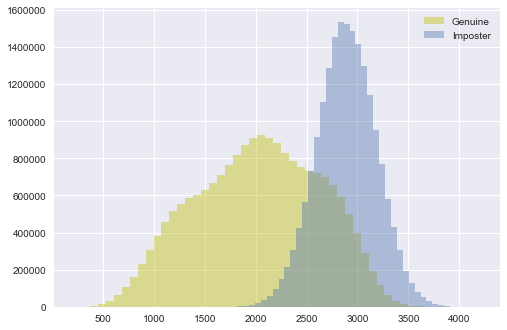

In [30]:
train_0 = train.loc[train['label'] == 0]
train_1 = train.loc[train['label'] == 1]

pdist_0 = pdist(train_0)
pdist_1 = pdist(train_1)
genuineList = np.append(pdist_0, pdist_1)

pdist_01 = distance_matrix(train_0, train_1)
imposterList = pdist_01.reshape(1, pdist_01.size)

sns.distplot(genuineList, color='y',label="Genuine", kde=0, norm_hist=0)
sns.distplot(imposterList, label="Imposter", kde=0, norm_hist=0)
plt.legend()

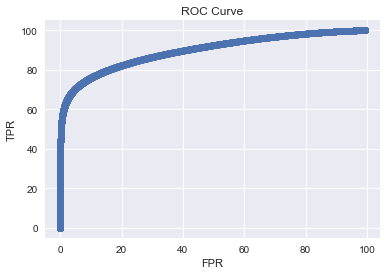

In [98]:
fpr = []
tpr = []

imposterList = pdist_01.reshape(1, pdist_01.size)[0]

genuineList.sort()
imposterList.sort()

maxDistance = max(genuineList[len(genuineList)-1], imposterList[len(imposterList)-1])

for i in range(0, int(maxDistance), 1):
    fpr.append(100.0 * bisect.bisect_left(imposterList, i)/float(len(genuineList)))
    tpr.append(100.0 * bisect.bisect_left(genuineList, i)/float(len(genuineList)))

plt.plot(fpr, tpr, '-o')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

In [100]:
fprtprList = np.add(fpr, tpr)
idx = np.abs(fprtprList-100).argmin()
print("Equal Error Rate: " + "{0:.2f}".format(fpr[idx]) + "%")

Equal Error Rate: 18.51%


In [ ]:
crossValidation(5, 4200, 3)

(1400, 784) (2800, 784)
(1400, 784) (2800, 784)
